# Linear Discriminant Analysis

In [76]:
# Import libraries
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [62]:
# Load dataset
df = data('bioChemists')

In [63]:
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


In [64]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,art,int64,15,0
1,fem,object,2,0
2,mar,object,2,0
3,kid5,int64,4,0
4,phd,float64,83,0
5,ment,int64,49,0


In [65]:
# One-hot encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [66]:
df

,art,kid5,phd,ment,fem_Women,mar_Single
1,0,0,2.52,7,0,0
2,0,0,2.05,6,1,1
3,0,0,3.75,6,1,1
4,0,1,1.18,3,0,0
5,0,0,3.75,26,1,1
...,...,...,...,...,...,...
911,11,2,2.86,7,0,0
912,12,1,4.29,35,0,0
913,12,1,1.86,5,0,0
914,16,0,1.74,21,0,0


In [67]:
y = df['fem_Women']
X = df.drop(columns=['fem_Women'])

In [68]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (915, 5) 
y: (915,)


In [69]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (732, 5)
X_test shape: (183, 5)
y_train shape: (732,)
y_test shape: (183,)


In [71]:
# Train the model
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [78]:
y_pred = clf.predict(X_test)

In [80]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.6557


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       106
           1       0.59      0.60      0.59        77

    accuracy                           0.66       183
   macro avg       0.65      0.65      0.65       183
weighted avg       0.66      0.66      0.66       183



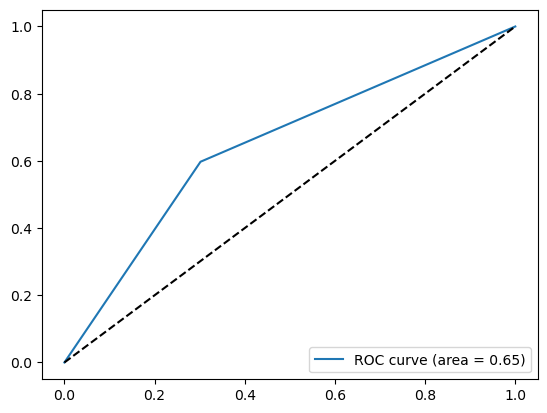

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")

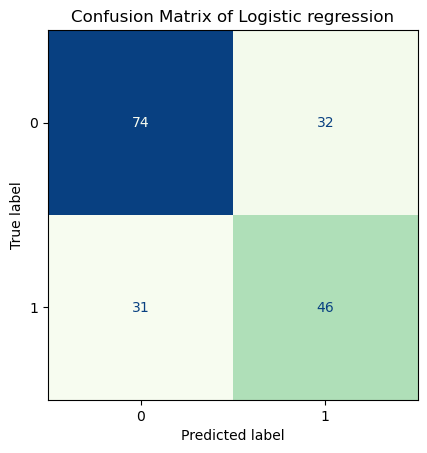

In [83]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Logistic regression')
plt.grid(False)